**Estudiante:**  Adriana Castillo

# Simulacion del grado de propagacion de la Covid-19 Ecuador

Para realizar esta  simulacion se utilizar la libreria pygame para ello se debe instalar pygame

conda install -c cogsci pygame.


## Introduccion

En una epidemia, el parámetro fundamental, del que todo depende, es R0. Este símbolo se refiere al número de personas que, mede cada infectado contagia antes de convertirse en inofensivo ( bien porque está en aislamiento, hospitalizado o ha muerto).

El valor R0 es fundamental, porque si es grande, el contagio se alarga más rápidamente. Si R0 es 2, y si el tiempo medio en el que se permanece contagiados es una semana, y hay 1.000 infectados, entonces después de una semana los infectados será 3.000 (los 1.000 del inicio más 2.000 nuevos contagiados). 

Si R0 es 5, después de una semana los infectados será 6.000 (los 1.000 de partida más 5.000 nuevos contagiados). A este punto, el ciclo vuelve a partir, con más o menos retraso, dependiendo de cuánto tiempo un nuevo infectado emplea en convertirse a sí mismo en contagioso.

Se reconstruye la dinámica de transmisión de una enfermedad inventada con cuatro escenarios diversos: 
- 1. Sin ninguna medida de contención; 
- 2. Con la cuarentena absoluta, aunque se «escapa» algún infectado; 
- 3. Con formas de aislamiento y la distancia de seguridad entre personas que permiten salir solo a un ciudadano de cada cuatro; 
- 4. Si sale solamente un ciudadano de cada ocho. En definitiva, solo con el aislamiento se puede contener la epidemia y lograr que la respuesta sanitaria sea eficaz. https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Entonces, el número reproductivo (R0): Este valor representa el número promedio de personas que un individuo infectado puede contagiar. Para el COVID-19, se estima que se encuentra entre 1.4 y 4 (Qun Li, 2020). Ademas segun  estimaciones de la OMS la probabilidad de fallecimiento es de 1.2% - 4.2%  segun https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30243-7/fulltext

In [ ]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 4.0  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana


# Practica
En concecuencia, generar 5 simulaciones: 
1. R0 obtenidos de la prediccion del SIR (Trabajo anterior)
2. Predecir que va a ocurrir la proxima semana.
3. El valor 4, el cual representaría el peor de los casos. 
4. El valor 1.4 en el mejor de los casos
5. R0 con las medidas realizadas por el Ecuador, obtenemos el R0 solo de los dias sin cuarentena y lo evaluan con los las acciones de la cuarentena.


Finalmente, agregar el numero de dias transcurridos, personas recuperadas y generar la curva SIR de las simulaciones.


Puntos extras: Plantee y realize mejoras al modelo de simulacion.

### 1. R0 obtenidos de la prediccion del SIR (Trabajo anterior)



ACTUAL
R0:  2.142902465143019


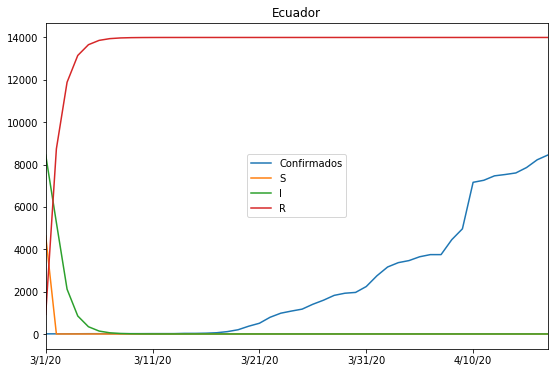

In [2]:
#Implementar
# MODELO SIR
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

    def load_confirmed(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        return new_index, extended_actual, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        data = (self.load_confirmed(self.country))
        self.i0=data[-1]
        optimal = minimize(loss, [0.001, 0.001], args=(data, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 1.95242), (0.00000001, 0.91111)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        new_index, extended_actual, prediction = self.predict(beta, gamma, data, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Confirmados': extended_actual, 'S': prediction.y[0], 'I': prediction.y[1], 'R': prediction.y[2]}, index=new_index)
        fig, ax = plt.subplots(figsize=(9, 6))
        ax.set_title(self.country)
        df.plot(ax=ax)
        self.r_0=beta/gamma
        #print(f"\n{self.country}, beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")
        
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
casos  = casos [casos ['Country/Region'] == 'Ecuador'].iloc[0].loc[:]

def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

poblacion=14000
i0=casos[-1]
r0=922
s0=poblacion - i0 - r0

print('ACTUAL')
actual = Learner('Ecuador', loss, '3/1/20', 5, s0, i0, r0)
actual.train()
R0a=actual.r_0
print('R0: ',R0a)

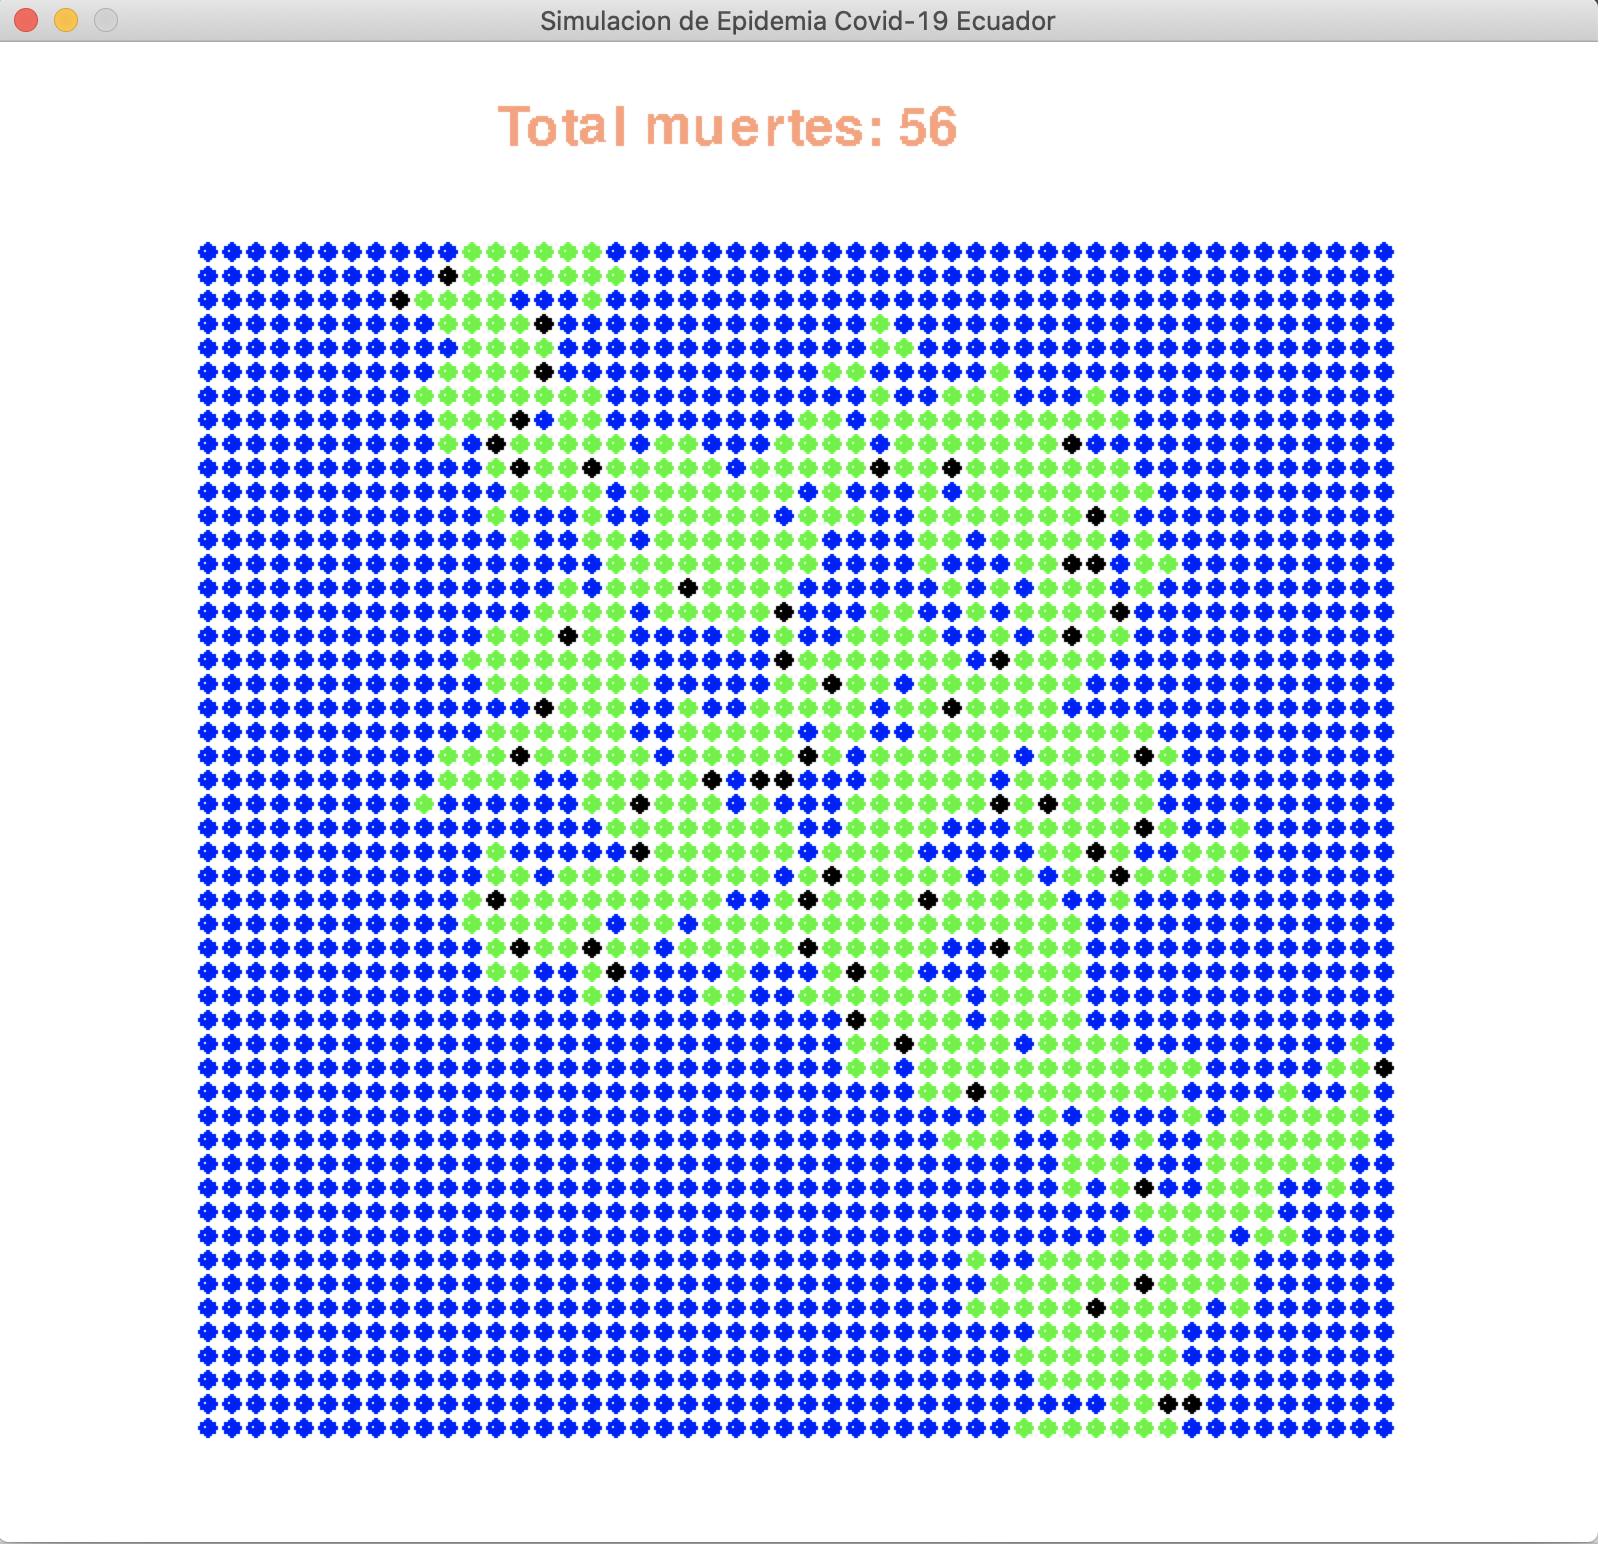

### 2. Predecir que va a ocurrir la proxima semana.

In [1]:
#Implementar
# MODELO SIR
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

    def load_confirmed(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        return new_index, extended_actual, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        data = (self.load_confirmed(self.country))
        self.i0=data[-1]
        optimal = minimize(loss, [0.001, 0.001], args=(data, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 1.95241), (0.00000001, 0.8888)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        new_index, extended_actual, prediction = self.predict(beta, gamma, data, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Confirmados': extended_actual, 'S': prediction.y[0], 'I': prediction.y[1], 'R': prediction.y[2]}, index=new_index)
        fig, ax = plt.subplots(figsize=(9, 6))
        ax.set_title(self.country)
        df.plot(ax=ax)
        self.r_0=beta/gamma
        #print(f"\n{self.country}, beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")
        
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
casos  = casos [casos ['Country/Region'] == 'Ecuador'].iloc[0].loc[:]

def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

poblacion=14000
i0=12803
r0=922
s0=poblacion - i0 - r0
print('EN UNA SEMANA')
semana = Learner('Ecuador', loss, '3/1/20', 60, s0, i0, r0)
semana.train()
R0s=semana.r_0
print('R0: ',R0s)

EN UNA SEMANA
R0:  2.196680918091809


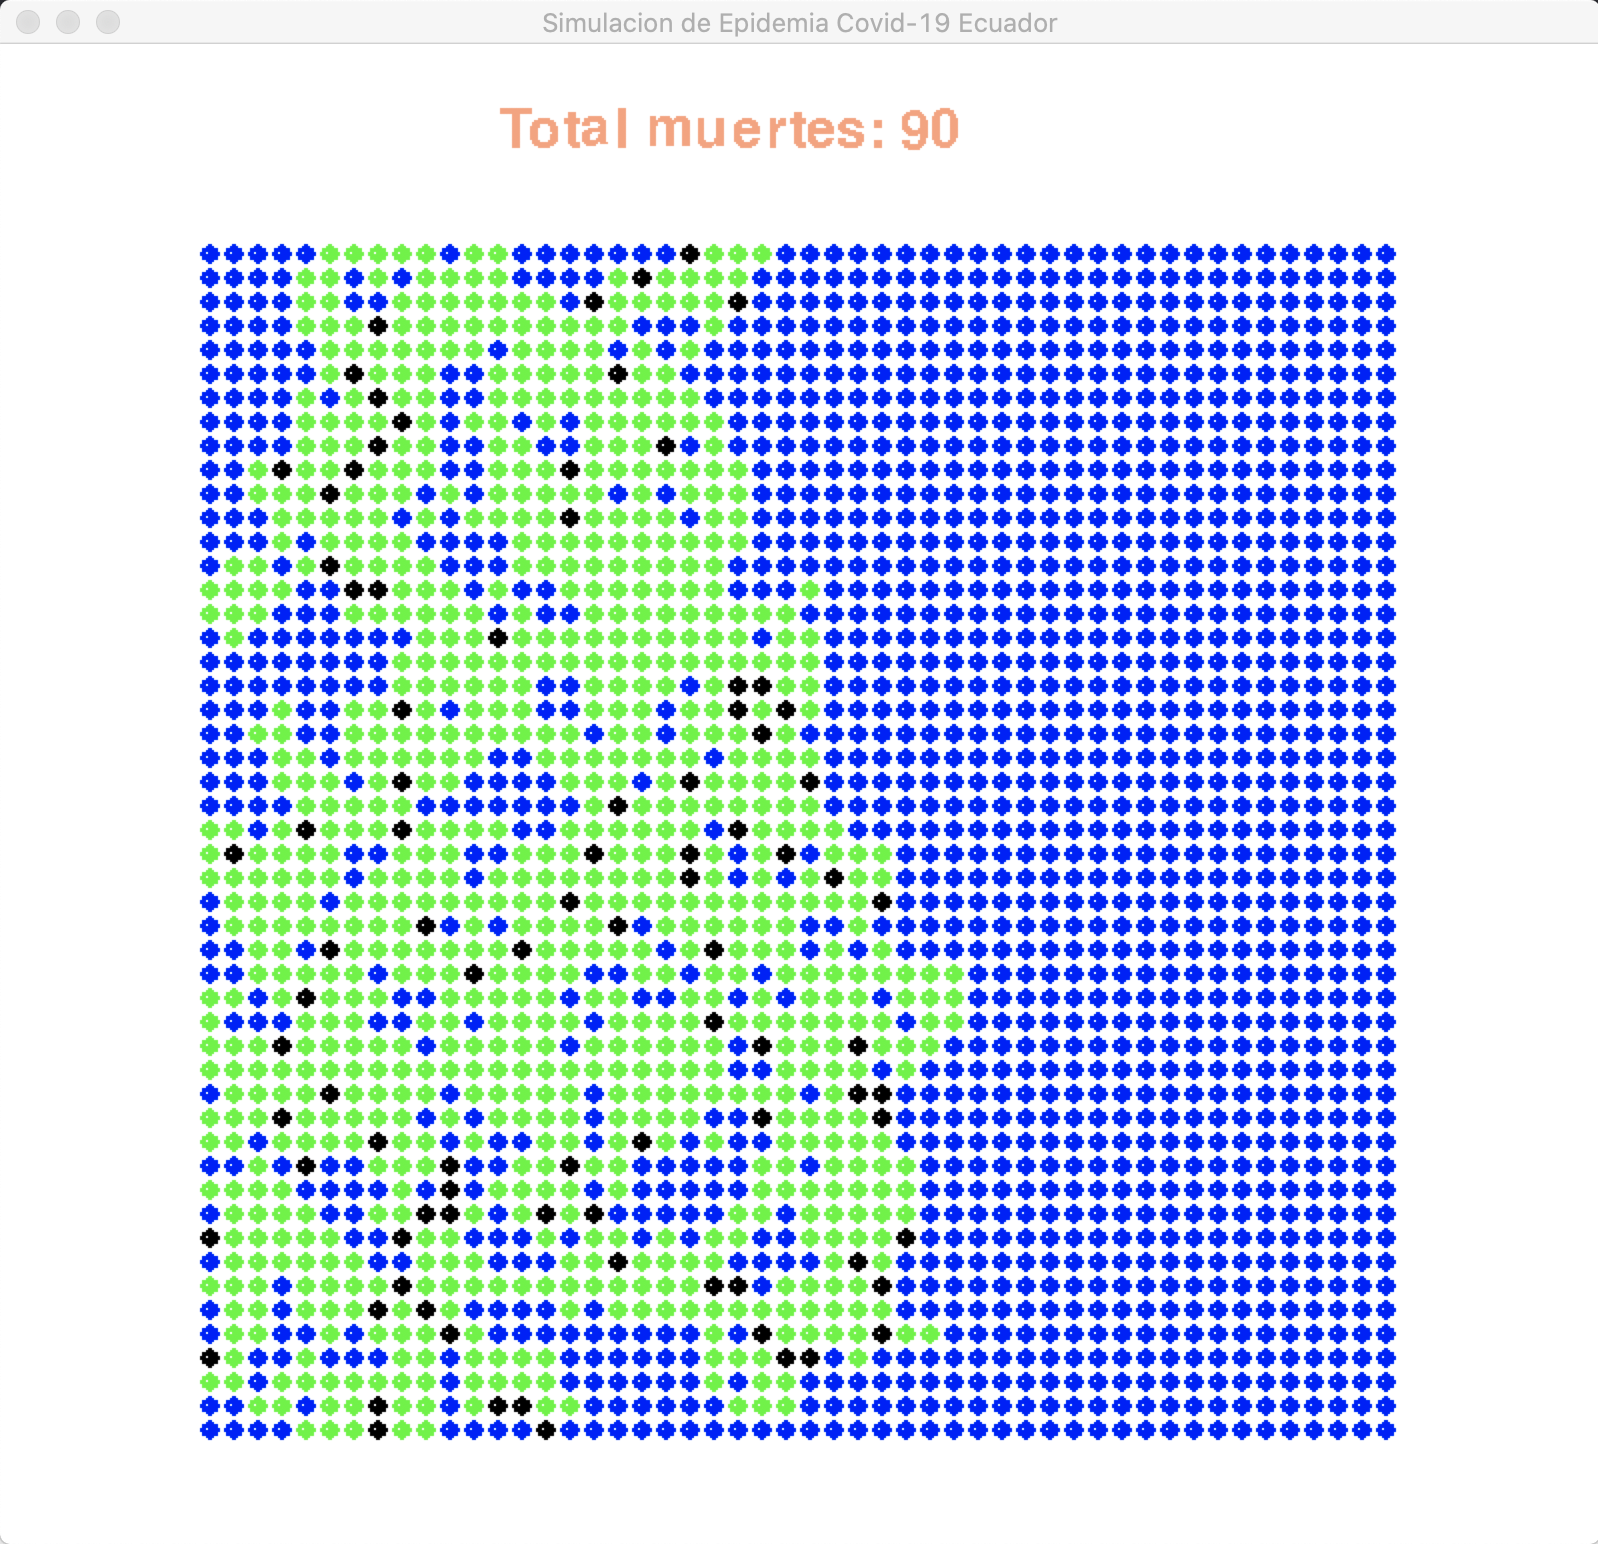

### 3. El valor 4, el cual representaría el peor de los casos. 

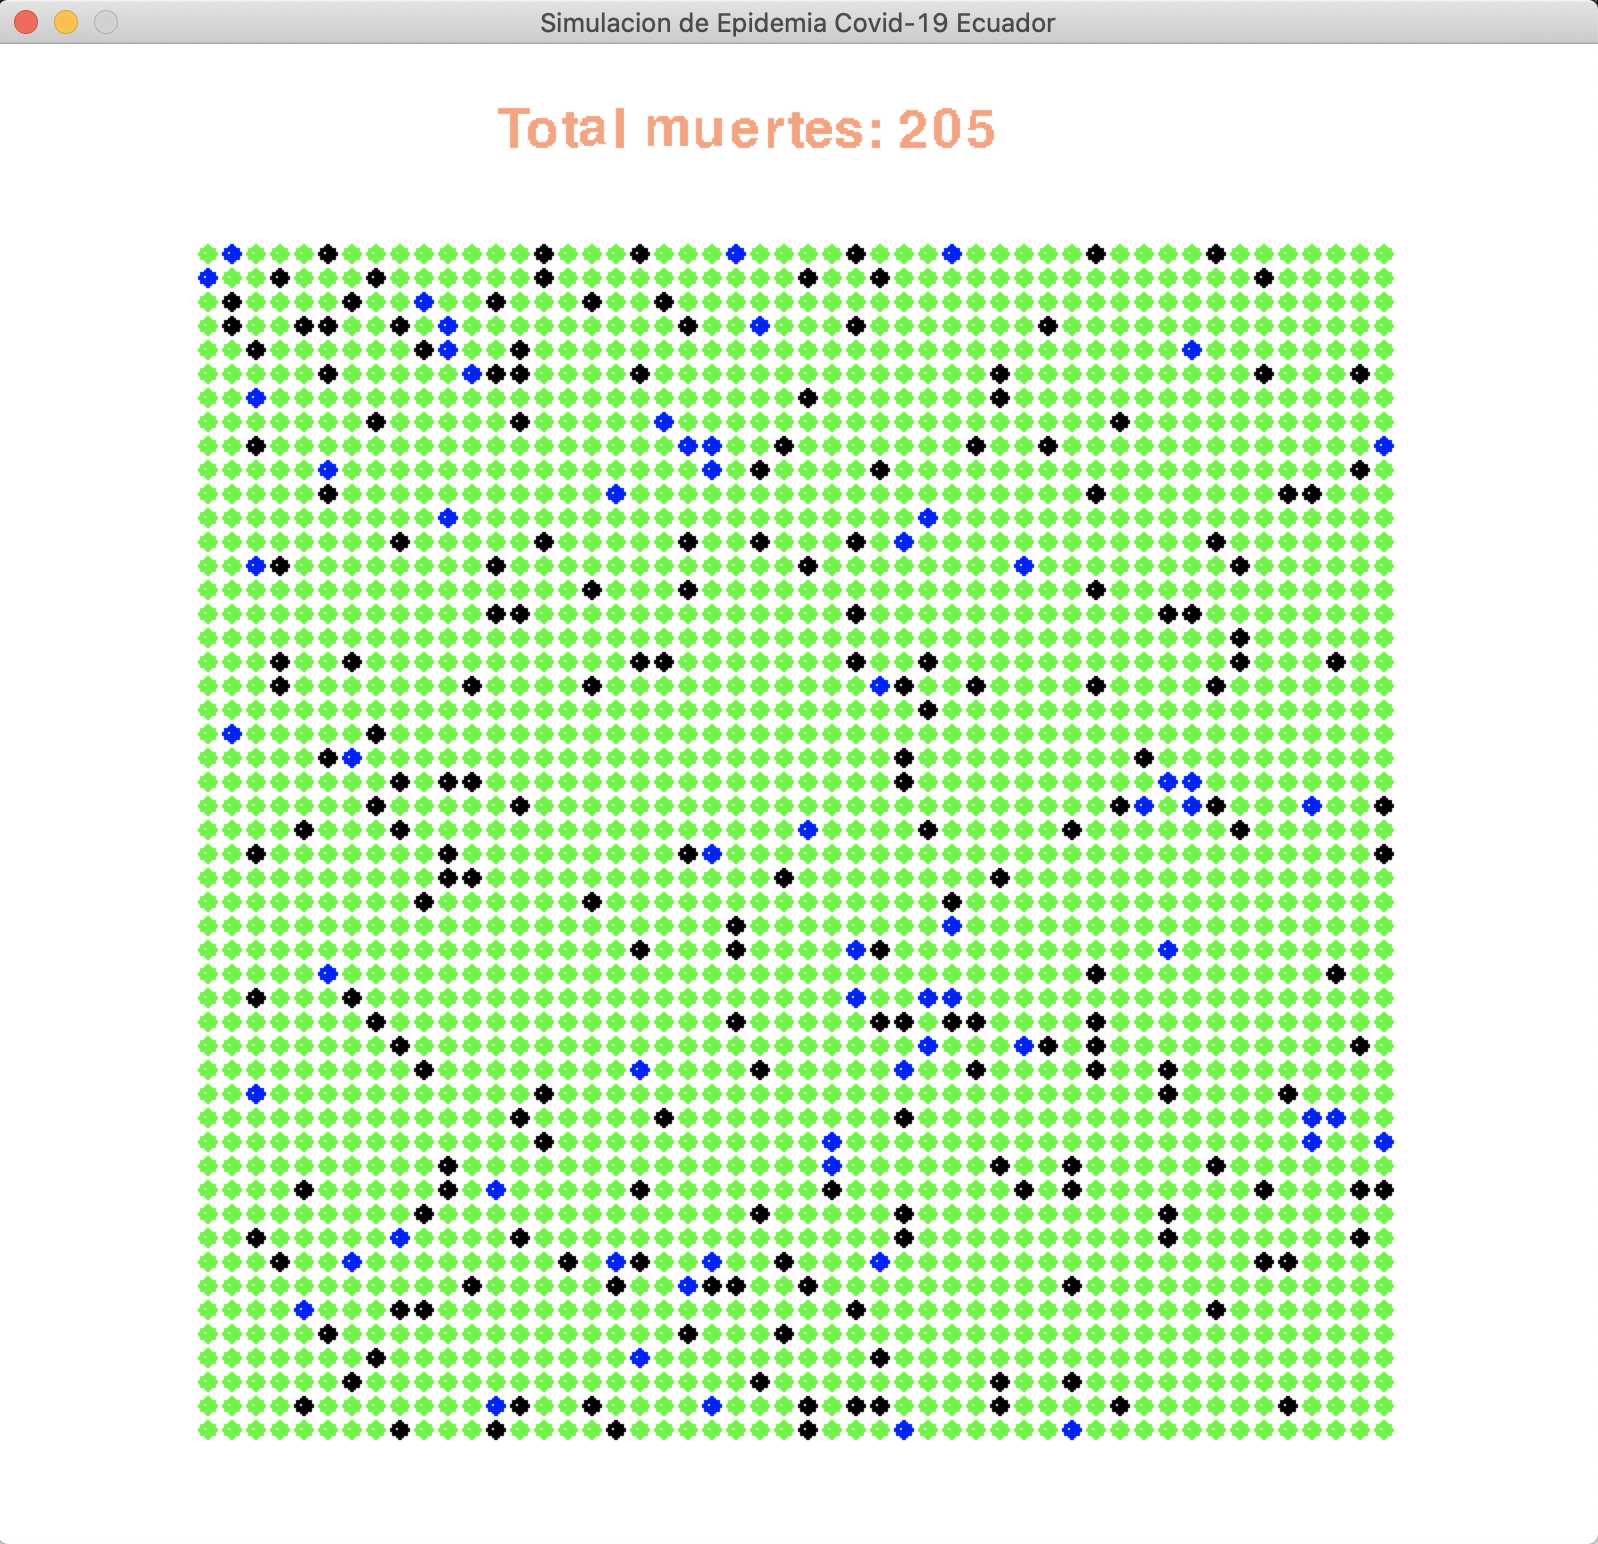

### 4. El valor 1.4 en el mejor de los casos

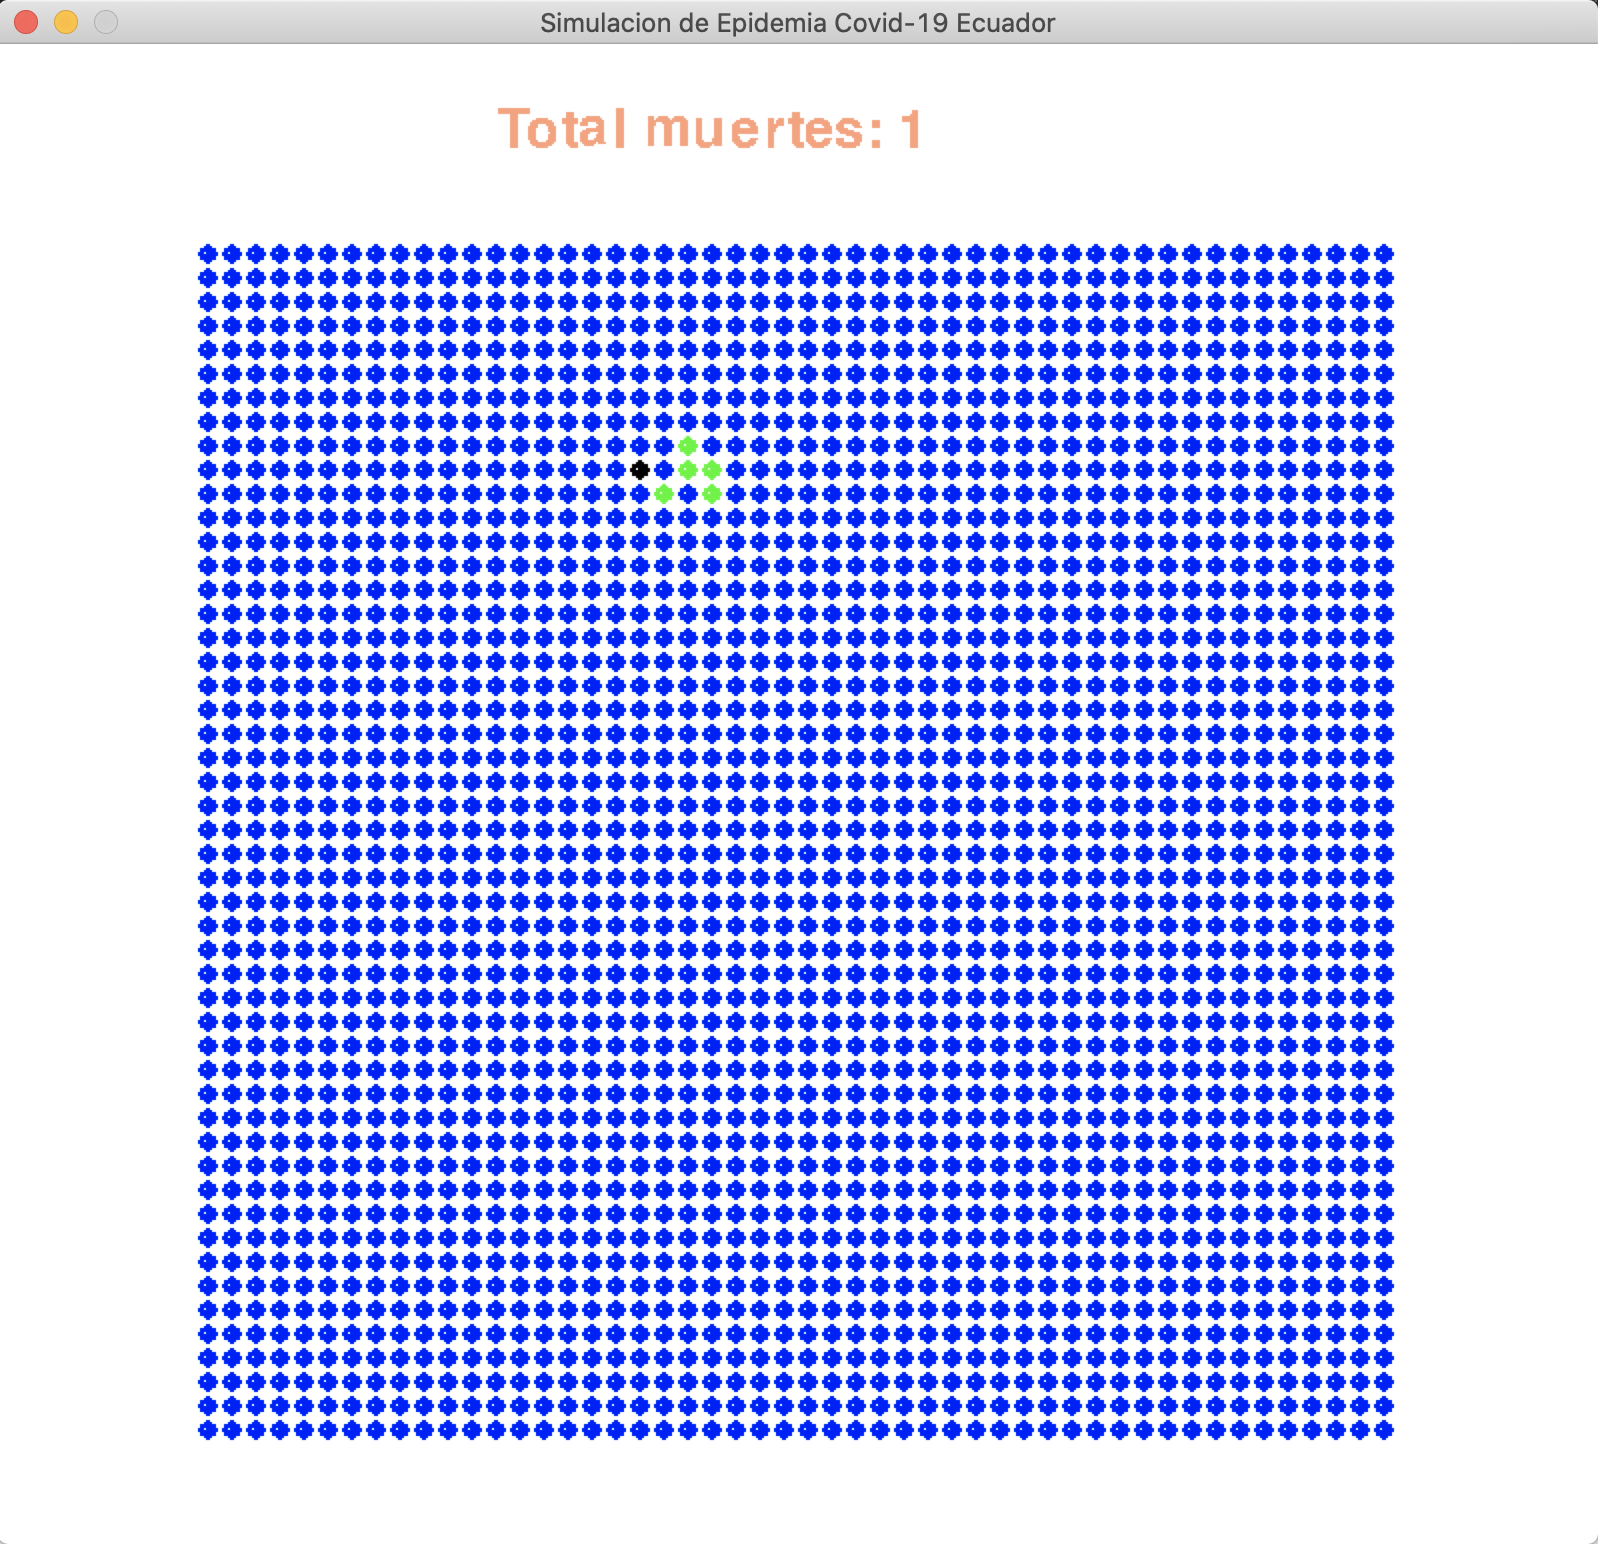

### 5. R0 con las medidas realizadas por el Ecuador, obtenemos el R0 solo de los dias sin cuarentena y lo evaluan con los las acciones de la cuarentena.

**Sin cuarentena**

SIN CUARENTENA
R0:  3.0258124432782068


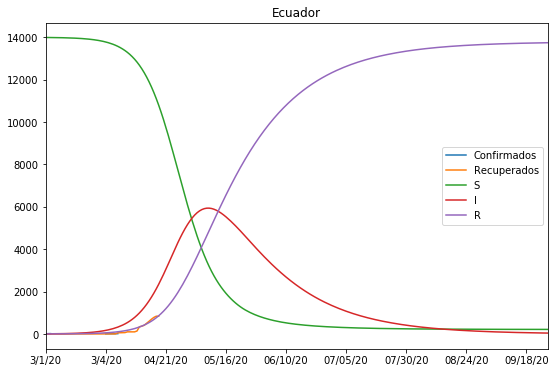

In [4]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0

    def load_confirmed(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:'3/11/20']


    def load_recovered(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def load_dead(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        current = current + timedelta(days=9)
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))


    def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
        beta, gamma = optimal.x
        #self.r_0="{0:.6f}".format(beta/gamma)
        self.r_0=(beta/gamma)*10000
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Confirmados': extended_actual, 'Recuperados': extended_recovered, 'S': prediction.y[0], 'I': prediction.y[1], 'R': prediction.y[2]}, index=new_index)
        fig, ax = plt.subplots(figsize=(9, 6))
        ax.set_title(self.country)
        df.plot(ax=ax)
        #print(f"\n{self.country}, beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")

dfC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfC = dfC[dfC['Country/Region'] == 'Ecuador'].iloc[0].loc[:]
def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))


def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

poblacion=14000

i0=6
r0=0
s0=poblacion - i0 - r0
print('SIN CUARENTENA')
no_cuarentena = Learner('Ecuador', loss, '3/1/20', 210, s0, i0, r0)
no_cuarentena.train()
R0n=no_cuarentena.r_0
print('R0: ',R0n)

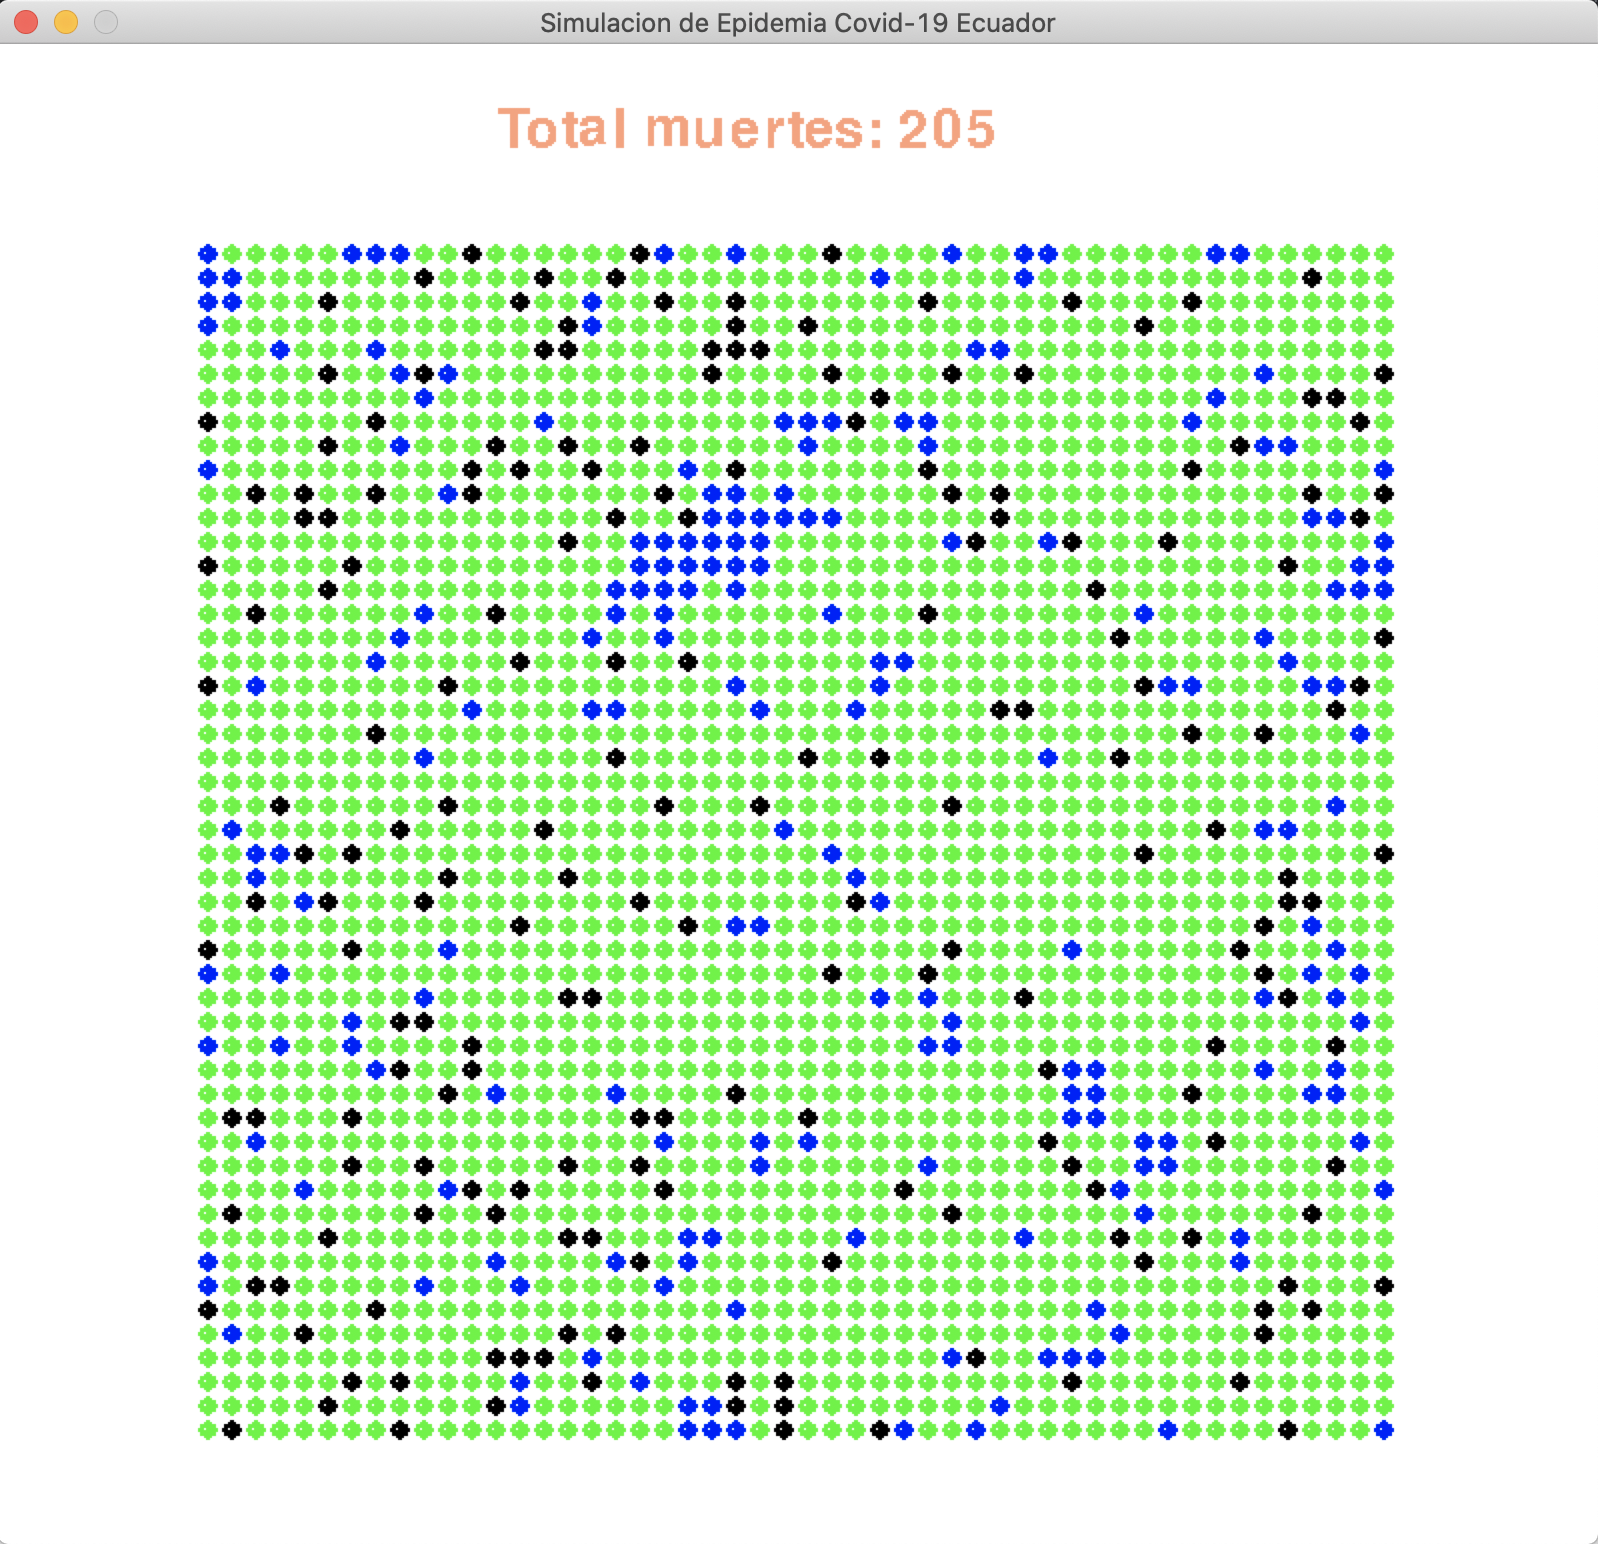

**Con cuarentena**

CON CUARENTENA
R0:  1.3713566496243637


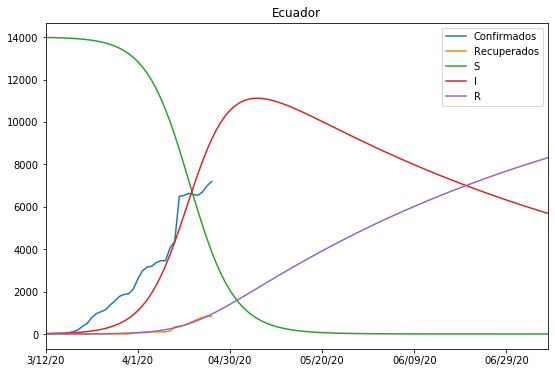

In [5]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0

    def load_confirmed(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_recovered(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def load_dead(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        current = current + timedelta(days=9)
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))


    def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
        beta, gamma = optimal.x
        self.r_0=(beta/gamma)*1000
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Confirmados': extended_actual, 'Recuperados': extended_recovered, 'S': prediction.y[0], 'I': prediction.y[1], 'R': prediction.y[2]}, index=new_index)
        fig, ax = plt.subplots(figsize=(9, 6))
        ax.set_title(self.country)
        df.plot(ax=ax)
        #print(f"\n{self.country}, beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")

dfC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfC = dfC[dfC['Country/Region'] == 'Ecuador'].iloc[0].loc[:]
def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))


def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

poblacion=14000
i0=17
r0=0
s0=poblacion - i0 - r0
print('CON CUARENTENA')
cuarentena = Learner('Ecuador', loss, '3/12/20',110, s0, i0, r0) # R0 en con cuarentena -> 
cuarentena.train()
R0c=cuarentena.r_0
print('R0: ',R0c)

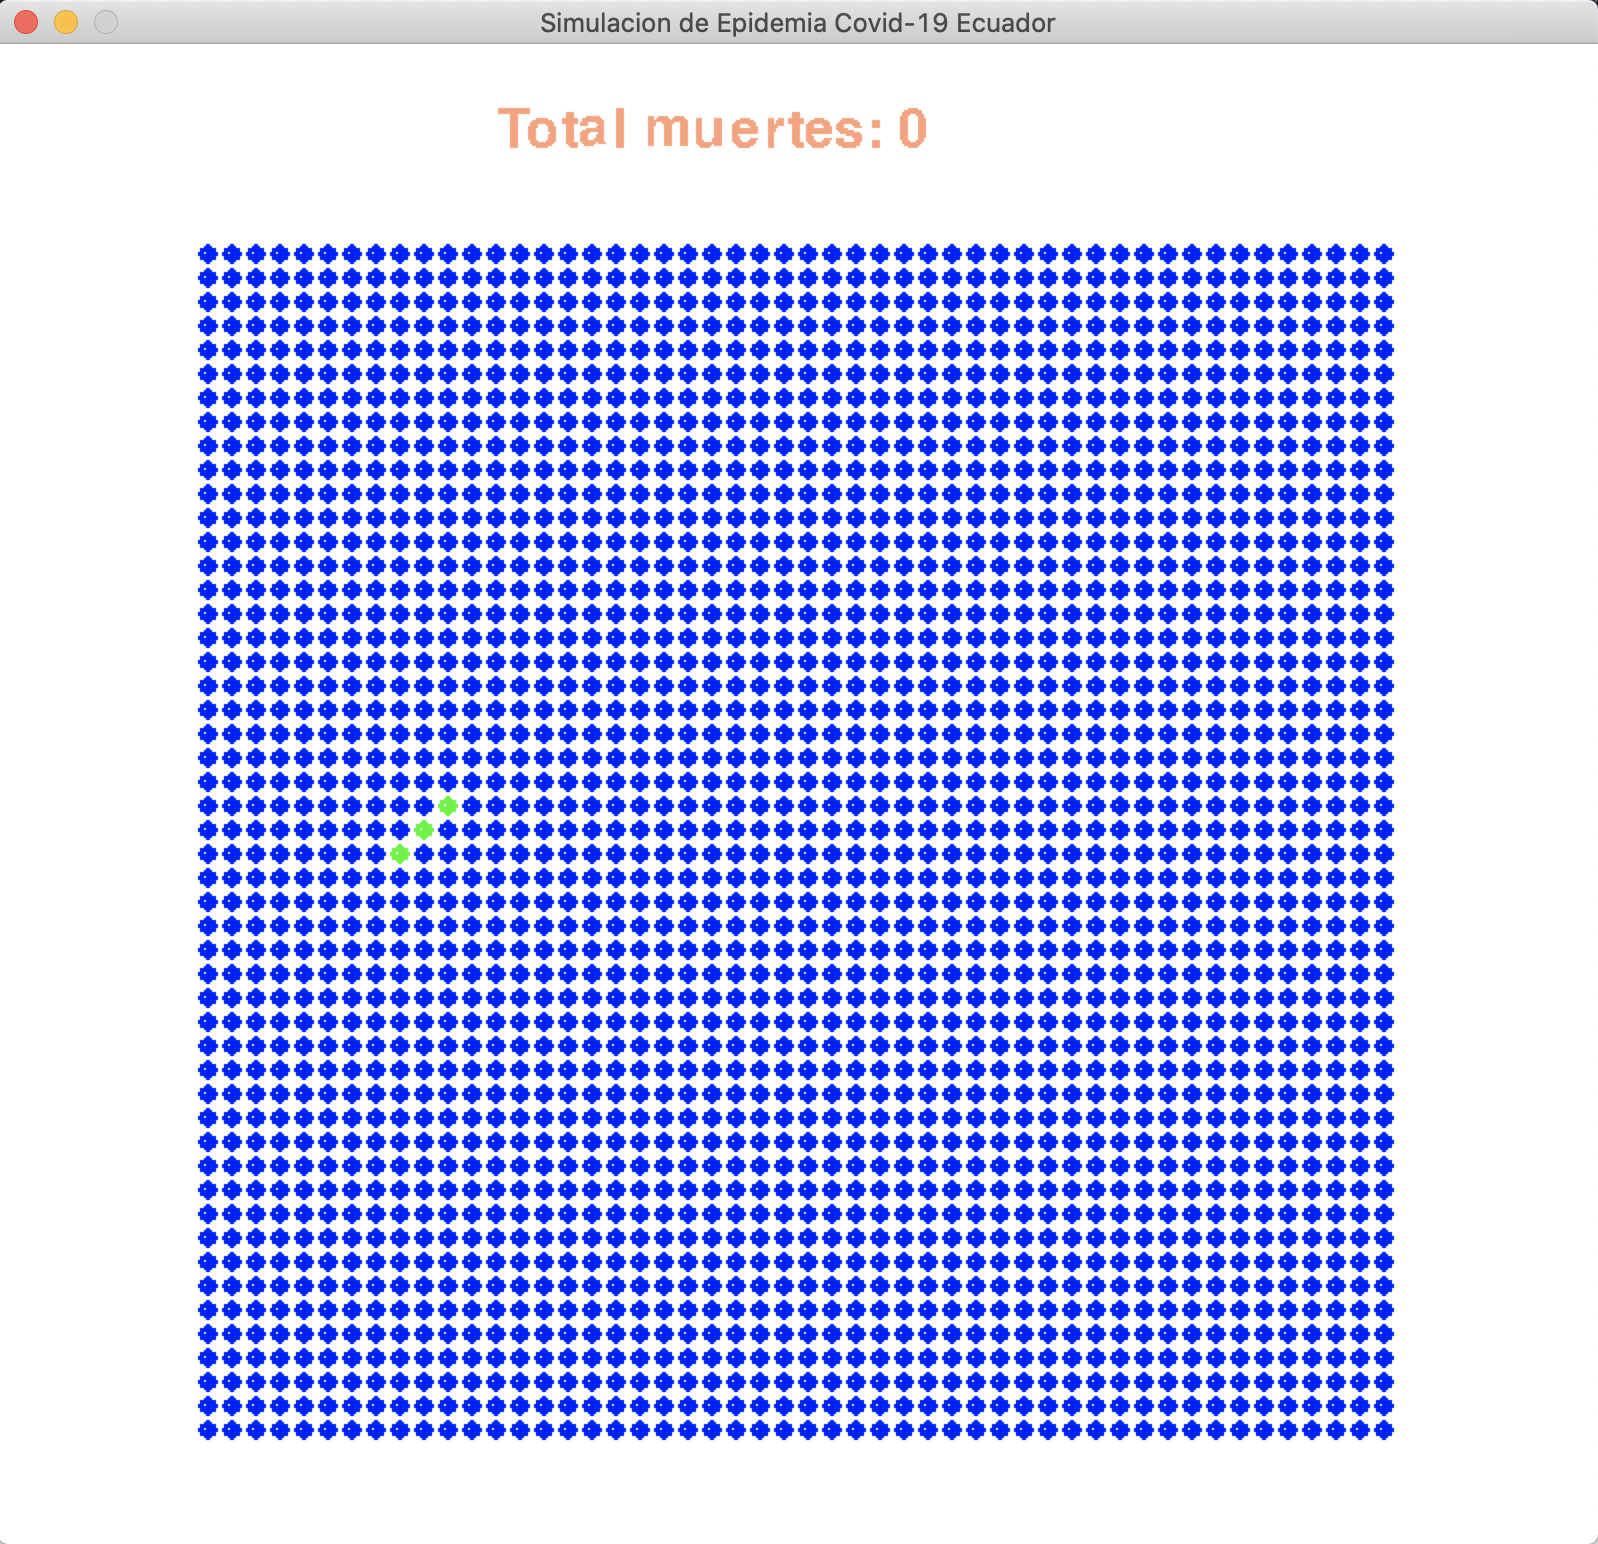

## Analisis
De acuerdos a los datos de entrada dependiendo de la situación que se analice,ya sea la semana altual, o la siguiente semana, o las semanas de cuarentena y no cuarentena el factor de contagio va a variar, es decir puede ir aumentando o disminuyendo según la circunstancias. 
R0 es un parámetro teórico que proporciona información sobre la velocidad de propagación de la enfermedad en una población específica.
El R0 en mejor de los casos debería ser de 1.4 y en el peor de los casos de 4 y según este valor en la simulación se puede ver que si R0 es bajo, no habrá muchos casos de fallecimiento, mientras que si es alto habrá un gran numero de contagiados y de fallecidos.

## Conclusiones
Como no tenemos datos reales sobre los casos de diagnóstico, recuperación y muerte, el modelo será inexacto y los valores de β y γ serán similares. El modelo predecirá el rango de infección. No hay datos reales sobre la tasa de recuperación e infección.

## Opinion
A pesar de las diversas medidas tomadas en el país, se puede ver que la tasa de infección continúa aumentando, el número de recuperación aumenta lentamente y la tasa de mortalidad también es muy alta, lo cual es muy preocupante. Esto debe enfatizarse a todos los ciudadanos para que puedan darse cuenta y cuidar de sí mismos y de otros en el país.

# Referencias
- http://code.intef.es/simulamos-una-epidemia-virica/